In [98]:
if 'libraries_imported' not in globals():
    libraries_imported = False

if libraries_imported == False:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os
    from datetime import datetime, timedelta
    from datetime import datetime
    from scipy.interpolate import make_interp_spline
    import plotly.graph_objects as go
    from scipy.signal import butter, filtfilt
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    from tensorflow.keras.layers import Input
    import sys
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    import numpy as np
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import RobustScaler
    import tensorflow as tf
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    from sklearn.preprocessing import RobustScaler
    import joblib

    # # Display the first few rows
    # import ace_tools as tools  # Importing display tool

In [99]:

# Load and clean SaniWASE dataset
saniWASE_df = pd.read_csv("datasets/SaniWASE_Data_Cleaned_t1.csv")
saniWASE_df["date"] = pd.to_datetime(saniWASE_df["datetime"])
saniWASE_df.drop(columns=["index", "datetime", "f/m_ratio", "fos", "tac"], inplace=True)

# Load and clean Cook dataset
cook_df = pd.read_csv("datasets/Cook_Data_Cleaned_t1.csv")
cook_df.drop(columns=["Unnamed: 0"], inplace=True)
cook_df["methane_percentage"] *= 100

# Ensure consistent column order, keeping "date" first
column_order = ["date"] + [col for col in saniWASE_df.columns if col != "date"]
saniWASE_df = saniWASE_df[column_order]
cook_df = cook_df[column_order]




#Only keep live data inputs 

saniWASE_df.drop(columns=["h2s_ppm", "t1_cod", "t1_olr", "eq_cod"], inplace=True)
cook_df.drop(columns=["h2s_ppm", "t1_cod", "t1_olr", "eq_cod"], inplace=True)


display(saniWASE_df.head())
display(cook_df.head())


saniWASE_df_interpolated = saniWASE_df.interpolate(method = 'ffill')
cook_df_interpolated = cook_df.interpolate(method = 'ffill')
# cook_df_interpolated = cook_df.dropna()


/tmp/ipykernel_12647/561820928.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  saniWASE_df["date"] = pd.to_datetime(saniWASE_df["datetime"])


,date,eq_ph,feed_vol,t1_ph,current,temp,methane_percentage,hrt,biogas_vol,fostac
0,2022-07-06,5.5,144,7.1,1652,36.8,65.1,25.0,1232.0,0.53
1,2022-08-06,5.3,144,7.2,1652,36.8,68.0,25.0,1019.0,0.34
2,2022-09-06,5.2,144,7.3,1652,36.8,70.9,25.0,1005.0,0.15
3,2022-10-06,5.2,192,7.3,1652,34.8,65.7,19.0,892.0,0.19
4,2022-11-06,NaN,192,NaN,1652,NaN,65.7,19.0,1100.0,NaN


,date,eq_ph,feed_vol,t1_ph,current,temp,methane_percentage,hrt,biogas_vol,fostac
0,2024-11-04,3.7,60.0,7.0,497.422,36.01,66.66,15.0,300.0,0.14
1,2024-11-04,3.7,60.0,7.0,497.422,35.87,66.66,15.0,300.0,0.14
2,2024-11-04,3.7,60.0,7.0,497.422,35.75,66.66,15.0,300.0,0.14
3,2024-11-04,3.7,60.0,7.0,497.422,35.56,66.66,15.0,300.0,0.14
4,2024-11-04,3.7,60.0,7.0,497.422,35.50,66.66,15.0,300.0,0.14


/tmp/ipykernel_12647/561820928.py:29: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  saniWASE_df_interpolated = saniWASE_df.interpolate(method = 'ffill')
/tmp/ipykernel_12647/561820928.py:30: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cook_df_interpolated = cook_df.interpolate(method = 'ffill')


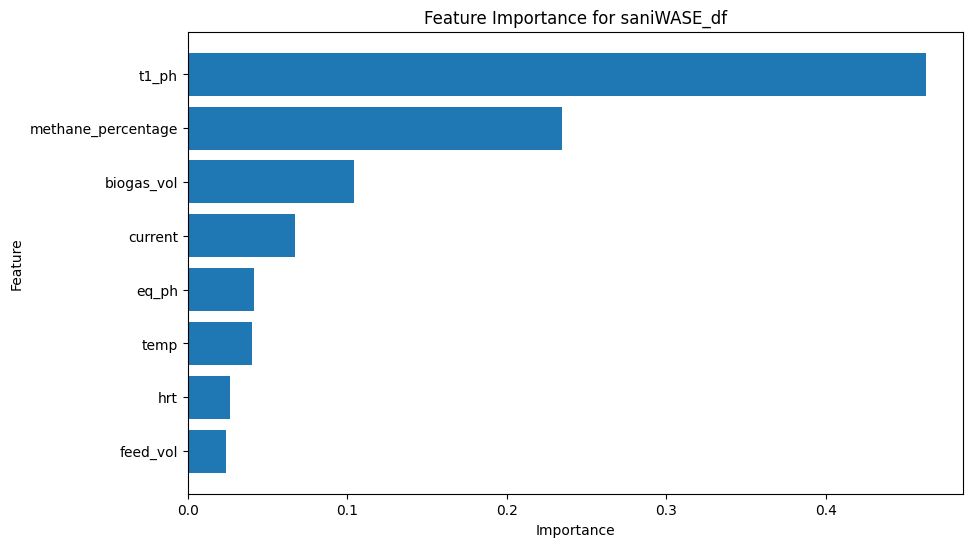

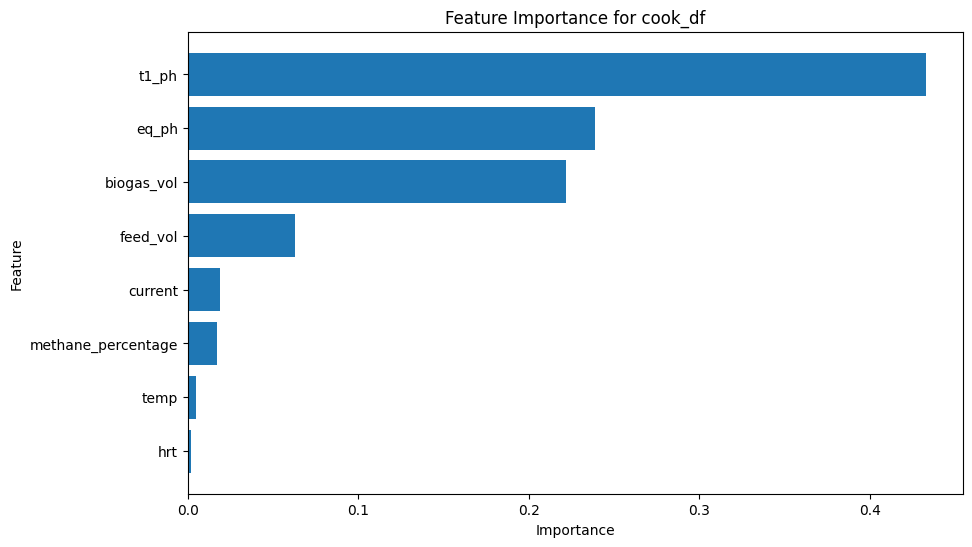

In [100]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Function to perform feature importance analysis
def feature_importance_analysis(df, target_column, drop_columns, title):
    # Prepare the data
    X = df.drop(drop_columns, axis=1)
    y = df[target_column]

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modeling
    model = RandomForestRegressor(n_estimators=300, random_state=42)
    model.fit(X_train, y_train)

    # Feature importance extraction
    importances = model.feature_importances_
    features = X_train.columns

    # Sorting the features by importance
    indices = np.argsort(importances)
    sorted_features = [features[i] for i in indices]
    sorted_importances = importances[indices]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_importances)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.show()

# Feature importance for saniWASE_df
feature_importance_analysis(
    df= saniWASE_df_interpolated,
    target_column='fostac',
    drop_columns=['fostac', 'date'],
    title='Feature Importance for saniWASE_df'
)

# Feature importance for cook_df
feature_importance_analysis(
    df= cook_df_interpolated,
    target_column='fostac',
    drop_columns=['fostac', 'date'],
    title='Feature Importance for cook_df'
)



# Feature Importance Comparison

## Common Observations
- **`t1_ph`** is the most significant feature in both datasets (importance > 0.4).
- **`biogas_vol`** consistently ranks among the top three features.

## Notable Differences

| Feature               | saniWASE_df Importance | cook_df Importance |
|-----------------------|------------------------|--------------------|
| **`methane_percentage`** | High (2nd)             | Low (6th)          |
| **`eq_ph`**              | Moderate (5th)         | High (2nd)         |
| **`feed_vol`**           | Low (8th)              | Moderate (4th)     |
| **`current`**            | Moderate (4th)         | Low (5th)          |
| **`temp`**               | Low (slightly higher)  | Very Low           |
| **`hrt`**                | Consistently low       | Lowest             |

## Overall Insights
- **`t1_ph`** consistently emerges as the most influential predictor, indicating pH's critical role across both scenarios.
- Secondary feature importance highlights dataset-specific dynamics:
  - **saniWASE_df** outcomes depend significantly on methane percentage and biogas volume.
  - **cook_df** outcomes rely heavily on equilibrium pH (`eq_ph`) and biogas volume.


In [101]:
scaler = joblib.load('ANN_hyperparams/robust_scaler.pkl')


cook_df_interpolated  = cook_df_interpolated[['fostac', 'date', 't1_ph', 'biogas_vol']]





Epoch 1/100
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4427 - mae: 0.4427 - val_loss: 0.2396 - val_mae: 0.2396 - learning_rate: 1.0000e-04
Epoch 2/100
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2667 - mae: 0.2667 - val_loss: 0.1384 - val_mae: 0.1384 - learning_rate: 1.0000e-04
Epoch 3/100
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1087 - mae: 0.1087 - val_loss: 0.1206 - val_mae: 0.1206 - learning_rate: 1.0000e-04
Epoch 4/100
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0616 - mae: 0.0616 - val_loss: 0.1292 - val_mae: 0.1292 - learning_rate: 1.0000e-04
Epoch 5/100
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0613 - mae: 0.0613 - val_loss: 0.1291 - val_mae: 0.1291 - learning_rate: 1.0000e-04
Epoch 6/100
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0579 - mae: 0.0579 - val_loss: 0.1294 - val_mae: 0.1294 - learning_rate: 1.0000e-04
Epoch 7/100
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0582 - mae: 0.0582 - val_loss: 0.1284 - val_mae: 0.1284

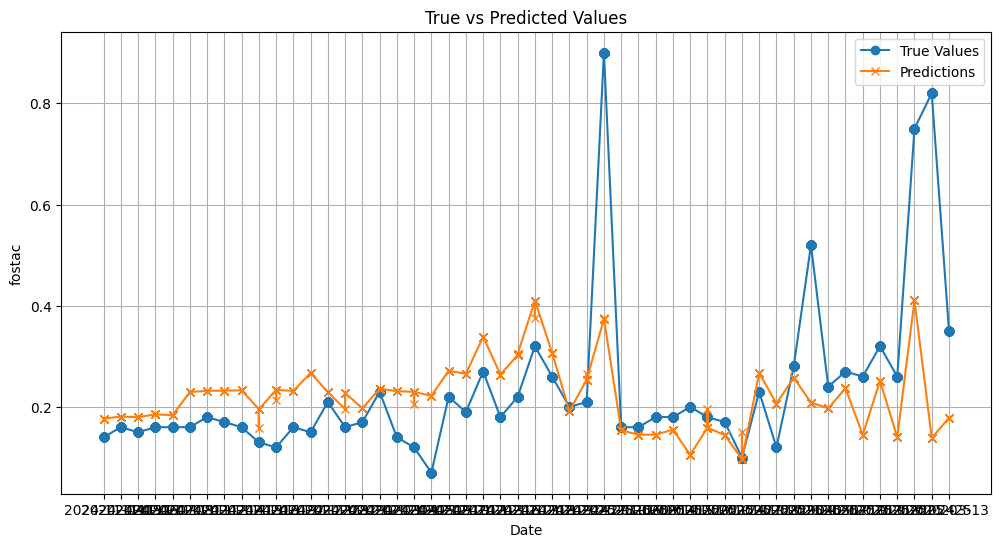

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import joblib

# Set seeds for reproducibility
np.random.seed(43)
tf.random.set_seed(43)

model_path = 'ANN_hyperparams/best_model.keras'
scaler_path = 'ANN_hyperparams/robust_scaler.pkl'

# Load pretrained scaler and model
scaler = joblib.load(scaler_path)
model = tf.keras.models.load_model(model_path)

# Freeze all layers except last two for transfer learning
for layer in model.layers[:-1]:
    layer.trainable = False
for layer in model.layers[-1:]:
    layer.trainable = True

# Data preparation (assuming df_cook is preloaded)
features = cook_df_interpolated.drop(['fostac', 'date'], axis=1)
targets = cook_df_interpolated['fostac']
dates = cook_df_interpolated['date']

# Determine indices for manual split
num_samples = len(features)
half_point = num_samples // 2

# Initialize results
true_values, predicted_values, prediction_dates = [], [], []

# Loop for two-fold cross-validation
for i in range(2):
    if i == 0:
        train_index = np.arange(0, half_point)
        val_index = np.arange(half_point, num_samples)
    else:
        train_index = np.arange(half_point, num_samples)
        val_index = np.arange(0, half_point)

    # Random index selection for partial swapping
    random_indices_from_val = np.random.choice(val_index, 10, replace=False)
    random_indices_from_train = np.random.choice(train_index, 5, replace=False)

    train_index = np.concatenate((train_index, random_indices_from_val))
    val_index = np.concatenate((val_index, random_indices_from_train))

    # Split data
    X_train, X_val = features.iloc[train_index], features.iloc[val_index]
    y_train, y_val = targets.iloc[train_index], targets.iloc[val_index]

    # Scaling
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Clone and compile transfer model
    transfer_model = tf.keras.models.clone_model(model)
    transfer_model.set_weights(model.get_weights())

    for layer in transfer_model.layers[:-1]:
        layer.trainable = False

    transfer_model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='mae', metrics=['mae'])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

    # Train model
    transfer_model.fit(
        X_train_scaled, y_train,
        epochs=100,
        validation_data=(X_val_scaled, y_val),
        batch_size=4,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Predict
    val_predictions = transfer_model.predict(X_val_scaled).flatten()

    # Collect results
    true_values.extend(y_val.tolist())
    predicted_values.extend(val_predictions.tolist())
    prediction_dates.extend(dates.iloc[val_index].tolist())

# Sort results by dates
sorted_indices = np.argsort(prediction_dates)
sorted_dates = np.array(prediction_dates)[sorted_indices]
sorted_true_values = np.array(true_values)[sorted_indices]
sorted_predictions = np.array(predicted_values)[sorted_indices]

# Performance Metrics
mae = mean_absolute_error(sorted_true_values, sorted_predictions)
mse = mean_squared_error(sorted_true_values, sorted_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(sorted_true_values, sorted_predictions)

print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R^2: {r2:.4f}')

# Optional Plot
plt.figure(figsize=(12, 6))
plt.plot(sorted_dates, sorted_true_values, label='True Values', marker='o')
plt.plot(sorted_dates, sorted_predictions, label='Predictions', marker='x')
plt.xlabel('Date')
plt.ylabel('fostac')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

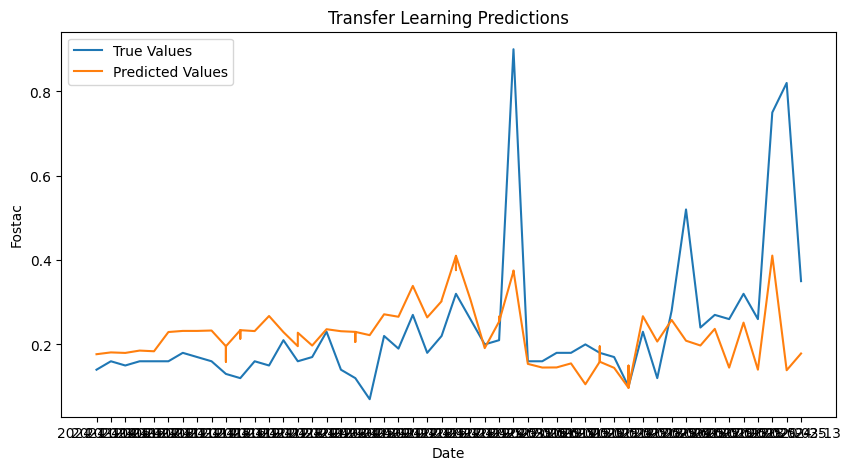

In [103]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(cook_df['date'], cook_df['fostac'], label='True Values')
plt.plot(sorted_dates, sorted_predictions, label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('Fostac')
plt.title('Transfer Learning Predictions')
plt.legend()
plt.show()